# This Is My Modeling Notebook

In [1]:
#Grabbing some mates

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

#### Importing my pulled data

In [2]:
lpt_df = pd.read_csv('./data/total_life_pro_tips.csv')
slpt_df = pd.read_csv('./data/total_shitty_life_pro_tips.csv')

In [3]:
lpt_df.head()

,Unnamed: 0,all_awardings,allow_live_comments,author,author_flair_css_class,author_flair_richtext,author_flair_text,author_flair_type,author_fullname,author_patreon_flair,...,author_flair_background_color,author_flair_text_color,banned_by,edited,author_cakeday,crosspost_parent,crosspost_parent_list,thumbnail_height,thumbnail_width,url_overridden_by_dest
0,0,[],False,levainletlive,NaN,[],NaN,text,t2_otior9k,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,[],False,RandomHuman01,NaN,[],NaN,text,t2_tpdoo,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,[],False,h3xadecimal2,NaN,[],NaN,text,t2_dyqx1k1,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,[],False,bethelmayflower,NaN,[],NaN,text,t2_b58sv,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,[],False,IFLE,NaN,[],NaN,text,t2_cmbb5,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
slpt_df.head()

,Unnamed: 0,all_awardings,allow_live_comments,author,author_flair_css_class,author_flair_richtext,author_flair_text,author_flair_type,author_fullname,author_patreon_flair,...,secure_media,secure_media_embed,author_flair_background_color,author_flair_text_color,banned_by,author_cakeday,link_flair_template_id,link_flair_text,edited,gilded
0,0,[],False,corinthian-blue1,NaN,[],NaN,text,t2_753se8cq,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,[],False,kremata,NaN,[],NaN,text,t2_y0sk4,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,[],False,corinthian-blue1,NaN,[],NaN,text,t2_753se8cq,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,[],False,ImJustMe176,NaN,[],NaN,text,t2_9680avbh,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,[],False,Barkingcat29,NaN,[],NaN,text,t2_g7vu3,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
end_lpt_df = lpt_df[['subreddit', 'selftext', 'title']]

In [6]:
end_slpt_df = slpt_df[['subreddit', 'selftext', 'title']]

In [7]:
all_the_tips_df = pd.concat([end_lpt_df, end_slpt_df])

In [8]:
all_the_tips_df.head()

,subreddit,selftext,title
0,LifeProTips,NaN,"LPT: If you’re considering getting a dog, firs..."
1,LifeProTips,[removed],"Three people you never lie to: your priest, yo..."
2,LifeProTips,[removed],AIs from AI Dungeon 2 to sexy to funny and one...
3,LifeProTips,If you need 113 grams of cottage cheese for ex...,LPT: Use the negative on a kitchen scale
4,LifeProTips,I learned at a very young age that if you want...,"LPT: Put a value on your time, no matter how y..."


In [14]:
all_the_tips_df.isnull().sum()

subreddit       0
selftext     1763
title           0
dtype: int64

In [27]:
all_the_tips_df.replace(np.nan, "", regex=True, inplace=True)

In [28]:
all_the_tips_df.isnull().sum()

subreddit    0
selftext     0
title        0
dtype: int64

In [56]:
X = all_the_tips_df['title']
y = all_the_tips_df['subreddit']

# Split the data into the training and testing sets.
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=42)

In [57]:
pipe = Pipeline([
    ('cvec', CountVectorizer()),
    ('logreg', LogisticRegression())
        
])

In [58]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('cvec', CountVectorizer()), ('logreg', LogisticRegression())])

In [59]:
pipe.score(X_train, y_train)

0.9763333333333334

In [60]:
pipe.score(X_test, y_test)

0.879

### I am a bit confused. Let's throw in a confusion matrix

In [61]:
preds = pipe.predict(X_test)

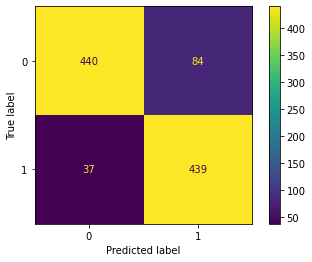

In [62]:
cm = confusion_matrix(y_test, preds)
tn, fp, fn, tp = cm.ravel()
ConfusionMatrixDisplay(cm).plot();